<img src="images/title.PNG" />      
---
        Team Members: Farhana Shafi, Rahat Ul Ain, Bia Chaudhry (Team Lead)

               NATIONAL UNIVERSITY OF SCIENCES AND TECHNOLOGY

            SCHOOL OF ELECTRICAL ENGINEERING AND COMPUTER SCIENCES

                             NUST-SEECS

                               2020

---

# TOP FIVE REGIONS RANKING BASED ON THE SUCCESS TOWARDS COVID-19 

---
# ANALYSES CONSTRAINTS

>>**OUT OF ALL THE PARAMETERS WE ARE CONSIDERING THE BELOW MENTIONED PARAMETERS FOR OUR ANALYSES:**

        1. Commulative tests performed
        2. Commulative tests positive
        3. Discharged
        4. Commulative Expired (region/province wise)
        5. No. of hospitals
        6. Total Admitted 
        7. Admitted Critical
        8. Recovered
        9. Quarantine Facilities
        10. Foreign Transmission Percentage
        11. Local Transmission Percentage

>>**WE HAVE USED THE ABOVE PARAMETERS AND WITH THE HELP OF PYTHON AND PANDAS PLOTTING FUNCTIONS, WE HAVE VISUALIZED AND DREW COMPARISONS BETWEEN THE VALUES OF THESE PARAMETERS**

>>**WE HAVE PERFORMED DATE-TIME SERIES COMPARISON AS THE GIVEN DATA IS RECORDED ON THE BASIS OF DATE**

>>**OUR ANALYSES AND INTERPRETATION IS BASED ON THE FOLLOWING COMPARISONS (for every region):**

        1. Total number of discharged patients with respect to date
        2. Total number of recovered patients with respect to date
        3. Total number of expired patients with respect to date
        4. Total number of positive tested patients with respect to date
        5. Total number of tests performed with respect to date
        6. Foriegn transmission trends with date
        7. Local transmission trends with date
        8. Total number of hospitals with respect to date
        9. Qurantine Facilities with respect to date 
        10. Total expired and total recovered patients
        11. Total positive tested as well as expired patients
        12. Total postive tested as well as recovered patients
        13. Positive tested out of all test cases with respect to date
        14. Critical patients out of all admitted patients with respect to date
        
        Note: There is a graph for every comparison stated above

# SOURCE CODE

In [0]:
# importing Python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# DATA PREPROCESSING

In [0]:
# load dataset
df = pd.read_excel('DEC_Dataset.xlsx')
df.columns # dataset columns

Index(['Date', 'Region', 'Area (km square)', 'Population (Consensus 2017)',
       'COVID-19 Lockdown (1= no lockdown        2= school closure          3 = Country wide lockdown)',
       'Cumulative Cases', 'Cumulative  tests performed',
       'Cumulative  Test positive', 'Discharged',
       'Cumulative Expired (region/province wise)', 'Home Quarantine',
       'Still admitted', 'No of hospitals ', 'Beds for COVID',
       'Total Admitted', 'Admitted Stable', 'Admitted Critical',
       'Admitted Venilator', 'Home Quarantine.1', 'Recovered',
       'Quarantine Facilities', 'Cumulative Quarantined',
       'Foreign Transmission Percentage ', 'Local Transmission Percentage '],
      dtype='object')

In [0]:
df.head(3) # showing dataset top 3 values (we have locally sorted the data w.r.t Area before loading)

,Date,Region,Area (km square),Population (Consensus 2017),COVID-19 Lockdown (1= no lockdown 2= school closure 3 = Country wide lockdown),Cumulative Cases,Cumulative tests performed,Cumulative Test positive,Discharged,Cumulative Expired (region/province wise),Home Quarantine,Still admitted,No of hospitals,Beds for COVID,Total Admitted,Admitted Stable,Admitted Critical,Admitted Venilator,Home Quarantine.1,Recovered,Quarantine Facilities,Cumulative Quarantined,Foreign Transmission Percentage,Local Transmission Percentage
0,2020-03-11 00:00:00,ICT,906,2001579,1,48,80,2,0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-12 00:00:00,ICT,906,2001579,1,52,85,2,0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-13 00:00:00,ICT,906,2001579,1,57,92,2,0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print('Total dataset rows: ' ,len(df))

Total dataset rows:  334


In [0]:
#calculating mean values of several parameters 

avg_discharged = max(df['Discharged'])/len(df)
avg_recovered = max(df['Recovered'].dropna())/len(df)
avg_expired = max(df['Cumulative Expired (region/province wise)'])/len(df)
avg_tests_performed = max(df['Cumulative  tests performed'])/len(df)
avg_positive = max(df['Cumulative  Test positive'])/len(df)
avg_hospitals = max(df['No of hospitals '].dropna())/len(df)
avg_facilities = max(df['Quarantine Facilities'].dropna())/len(df)
avg_for_trans = max(df['Foreign Transmission Percentage '].dropna())/len(df)
avg_loc_trans = max(df['Local Transmission Percentage '].dropna())/len(df)

print('average discharged = ', avg_discharged)
print('average recovered = ', avg_recovered)
print('average expired = ', avg_expired)
print('average tests performed = ', avg_tests_performed)
print('average positive tested = ', avg_positive)
print('average No. of hospitals = ', avg_hospitals)
print('average facilities in Quarantine = ', avg_facilities)
print('average foreign transmissions = ', avg_for_trans)
print('average local transmissions = ', avg_loc_trans)

average discharged =  7.7155688622754495
average recovered =  3.37125748502994
average expired =  0.27844311377245506
average tests performed =  214.74850299401197
average positive tested =  16.101796407185628
average No. of hospitals =  0.5988023952095808
average facilities in Quarantine =  0.8353293413173652
average foreign transmissions =  0.002485029940119761
average local transmissions =  0.002754491017964072


In [0]:
# view region-wise data values' count via group_by regions 
df.groupby(['Region']).count().sort_values('Area (km square)')

,Date,Area (km square),Population (Consensus 2017),COVID-19 Lockdown (1= no lockdown 2= school closure 3 = Country wide lockdown),Cumulative Cases,Cumulative tests performed,Cumulative Test positive,Discharged,Cumulative Expired (region/province wise),Home Quarantine,Still admitted,No of hospitals,Beds for COVID,Total Admitted,Admitted Stable,Admitted Critical,Admitted Venilator,Home Quarantine.1,Recovered,Quarantine Facilities,Cumulative Quarantined,Foreign Transmission Percentage,Local Transmission Percentage
Region,,,,,,,,,,,,,,,,,,,,,,,
KPTD,12,12,12,12,12,12,12,12,12,0,12,0,0,0,0,0,0,0,0,0,0,0,0
AJK,46,46,46,46,46,46,46,46,46,28,46,22,22,22,22,22,22,22,22,22,22,22,22
Balochistan,46,46,46,46,46,46,46,46,46,28,46,22,22,22,22,22,22,22,22,22,22,22,22
GB,46,46,46,46,46,46,46,46,46,28,46,22,22,22,22,22,22,22,22,22,22,22,22
ICT,46,46,46,46,46,46,46,46,46,28,46,22,22,22,22,22,22,22,22,22,22,22,22
KP,46,46,46,46,46,46,46,46,46,28,46,22,22,22,22,22,22,22,22,22,22,22,22
Punjab,46,46,46,46,46,46,46,46,46,28,46,22,22,22,22,22,22,22,22,22,22,22,22
Sindh,46,46,46,46,46,46,46,46,46,28,46,22,22,22,22,22,22,22,22,22,22,22,22


In [0]:
# transform dates into same format within dataset
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
# splitting data into dataframes on the basis of regions and sort them on the basis of dates
# there are total 8 regions i.e. ICT, AJK, KPTD, GB, KP, Sindh, Punjab, and Balochistan

ict = df[df['Region'] == 'ICT'].sort_values('Date')
ajk = df[df['Region'] == 'AJK'].sort_values('Date')
kptd = df[df['Region'] == 'KPTD'].sort_values('Date')
gb = df[df['Region'] == 'GB'].sort_values('Date')
kp = df[df['Region'] == 'KP'].sort_values('Date')
sindh = df[df['Region'] == 'Sindh'].sort_values('Date')
punjab = df[df['Region'] == 'Punjab'].sort_values('Date')
balochistan = df[df['Region'] == 'Balochistan'].sort_values('Date')

# DATA ANALYSES AND VISUALIZATION

>> NOTE: ***We can see that KPTD data is almost near to none, so we are not considering KPTD In our analyses for now.***

>***1. VISUALIZE REGION-WISE DISCHARGED PATIENTS WITH DATE-TIME SERIES***

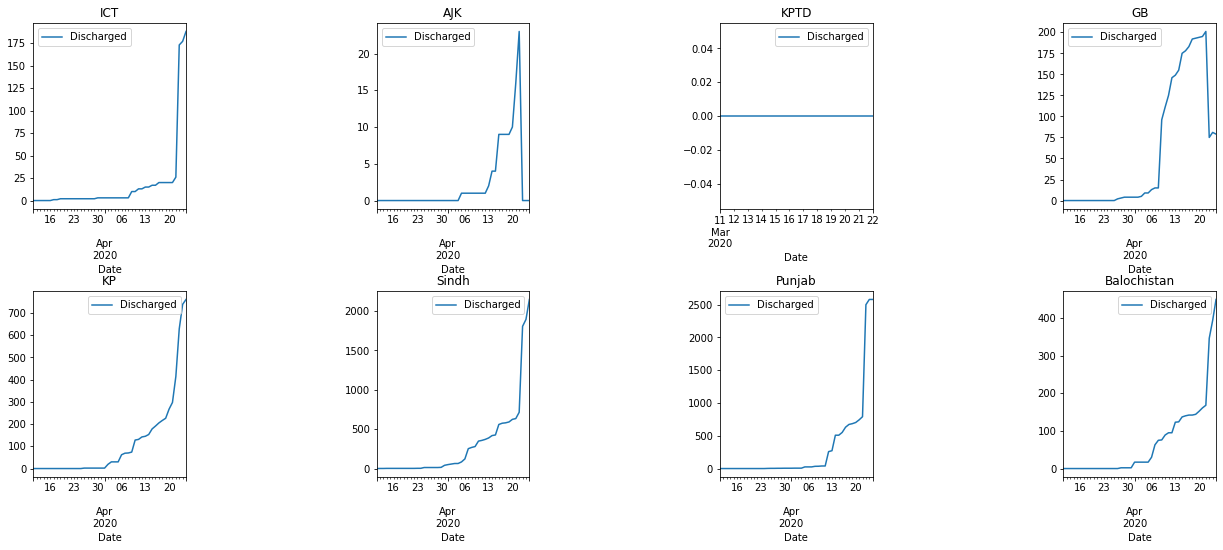

In [0]:
#ploting number of discharged patients graph with date for every region

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.tight_layout(pad=2.0) 

ict.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='ICT', ax=axes[0,0])
ajk.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='AJK', ax=axes[0,1] )
kptd.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='KPTD', ax=axes[0,2])
gb.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='GB', ax=axes[0,3])

kp.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='KP', ax=axes[1,0])
sindh.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='Sindh', ax=axes[1,1])
punjab.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='Punjab', ax=axes[1,2])
balochistan.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='Balochistan', ax=axes[1,3])

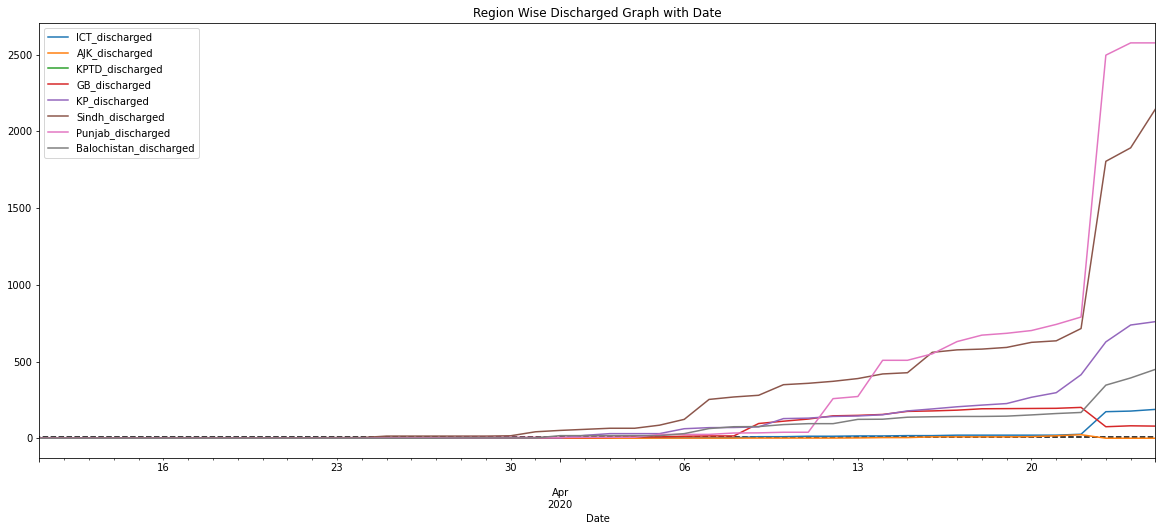

In [0]:
# ploting Discharged patients rate change with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='Discharged', kind='line', figsize=(20,8), title='Region Wise Discharged Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Discharged')
ax2 = kptd.plot(ax=ax1, x ='Date', y='Discharged')
ax3 = gb.plot(ax=ax2, x ='Date', y='Discharged')
ax4 = kp.plot(ax=ax3, x ='Date', y='Discharged')
ax5 = sindh.plot(ax=ax4, x ='Date', y='Discharged')
ax6 = punjab.plot(ax=ax5, x ='Date', y='Discharged')
ax7 = balochistan.plot(ax=ax6, x ='Date', y='Discharged')
ax.legend(["ICT_discharged", "AJK_discharged",'KPTD_discharged','GB_discharged','KP_discharged','Sindh_discharged','Punjab_discharged','Balochistan_discharged']);
ax.hlines(xmin=0, xmax=10000000, y =avg_discharged, linestyles='dashed', color='black')

***Dotted line in the graph is showing average value.***
***Ranking of regions with decreasing order of discharge rate is:***

        1. Punjab
        2. Sindh
        3. KP
        4. Balochistan
        5. ICT
        6. GB
        7. AJK

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

>***2. VISUALIZE REGION-WISE EXPIRED PATIENTS WITH DATE-TIME SERIES***

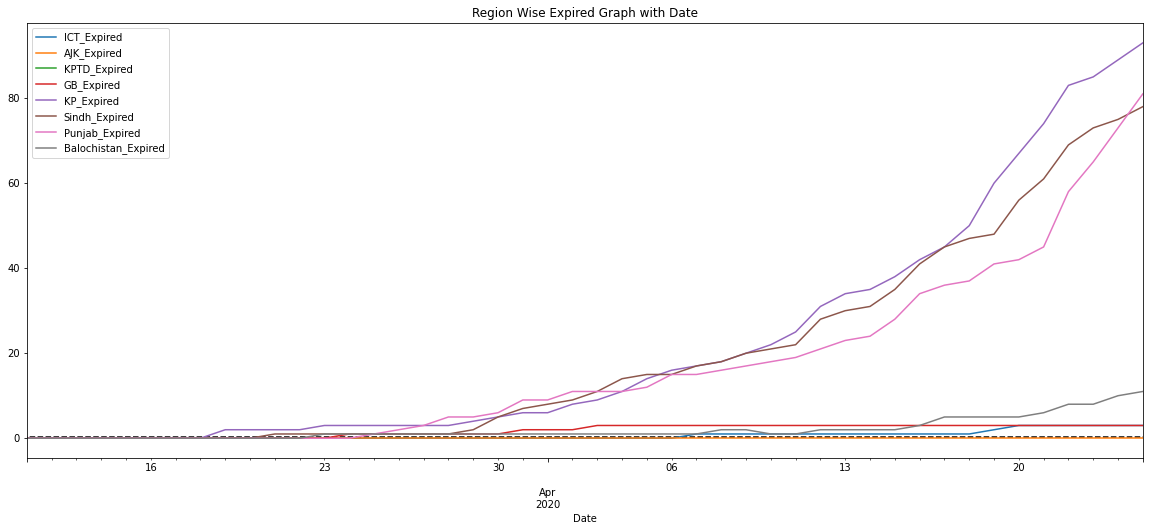

In [0]:
# ploting Expired patients rate with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='Cumulative Expired (region/province wise)', kind='line', figsize=(20,8), title='Region Wise Expired Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Cumulative Expired (region/province wise)')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Cumulative Expired (region/province wise)')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Cumulative Expired (region/province wise)')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Cumulative Expired (region/province wise)')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Cumulative Expired (region/province wise)')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Cumulative Expired (region/province wise)')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Cumulative Expired (region/province wise)')
ax.legend(["ICT_Expired", "AJK_Expired",'KPTD_Expired','GB_Expired','KP_Expired','Sindh_Expired','Punjab_Expired','Balochistan_Expired']);
ax.hlines(xmin=0, xmax=10000000, y =avg_expired, linestyles='dashed', color='black')

***Dotted line in the graph is showing average value.***
***Ranking of regions with decreasing order of expired rate are:***

        1. AJK
        2. GB
        3. ICT
        4. Balochistan
        5. Punjab
        6. Sindh
        7. KP

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

>***3. VISUALIZE REGION-WISE RECOVERED PATIENTS WITH DATE-TIME SERIES***

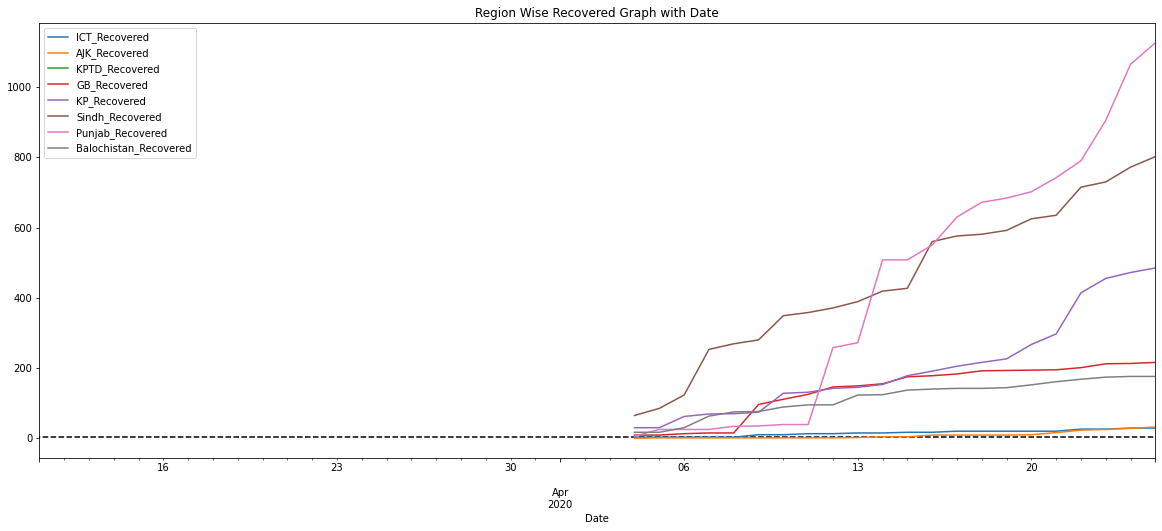

In [0]:
# ploting Recovered patients rate change with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='Recovered', kind='line', figsize=(20,8), title='Region Wise Recovered Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Recovered')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Recovered')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Recovered')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Recovered')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Recovered')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Recovered')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Recovered')
ax.legend(["ICT_Recovered", "AJK_Recovered",'KPTD_Recovered','GB_Recovered','KP_Recovered','Sindh_Recovered','Punjab_Recovered','Balochistan_Recovered']);
ax.hlines(xmin=0, xmax=10000000, y =avg_recovered, linestyles='dashed', color='black')

> Here the empty region of Graph is showing the unavailability of data in the respective dates 

***Dotted line in the graph is showing average value.***
***Ranking of regions with decreasing order of recovered rate is:***

        1. Punjab
        2. Sindh
        3. KP
        4. GB
        5. Balochistan
        6. AJK
        7. ICT

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

>***4. VISUALIZE REGION-WISE POSITVE TESTED PATIENTS WITH DATE-TIME SERIES***

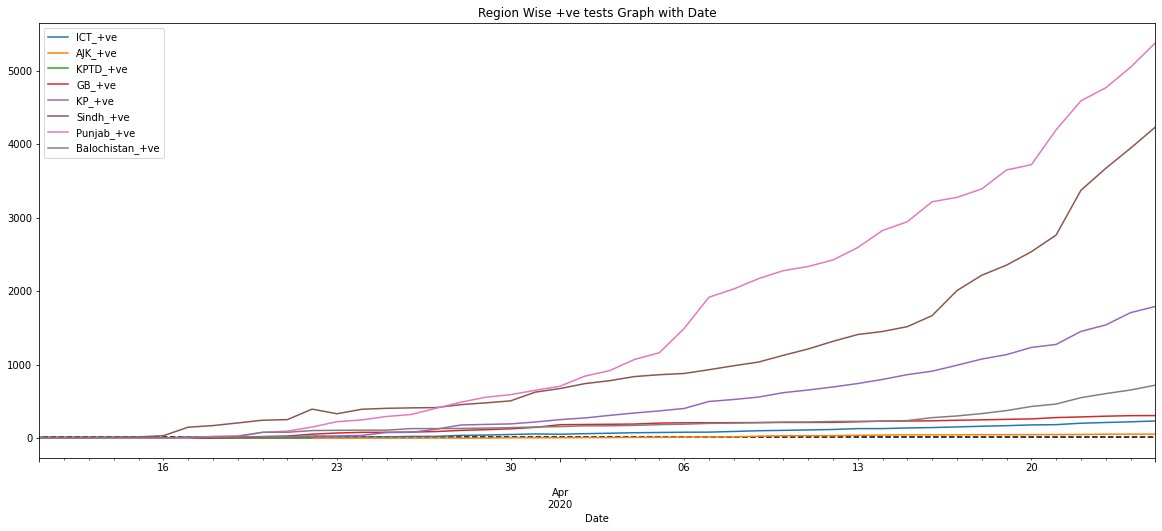

In [0]:
# ploting Positive Tested Patients rate with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='Cumulative  Test positive', kind='line', figsize=(20,8), title='Region Wise +ve tests Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Cumulative  Test positive')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Cumulative  Test positive')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Cumulative  Test positive')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Cumulative  Test positive')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Cumulative  Test positive')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Cumulative  Test positive')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Cumulative  Test positive')
ax.legend(["ICT_+ve", "AJK_+ve",'KPTD_+ve','GB_+ve','KP_+ve','Sindh_+ve','Punjab_+ve','Balochistan_+ve']);
ax.hlines(xmin=0, xmax=10000000, y =avg_positive, linestyles='dashed', color='black')

***Dotted line in the graph is showing average value.***
***Ranking of regions with the decreasing order of positive tested rate are:***

        1. AJK
        2. ICT
        3. GB
        4. Balochistan
        5. KP
        6. Sindh
        7. Punjab

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

>***5. VISUALIZE REGION-WISE TESTS PERFORMED WITH DATE-TIME SERIES***

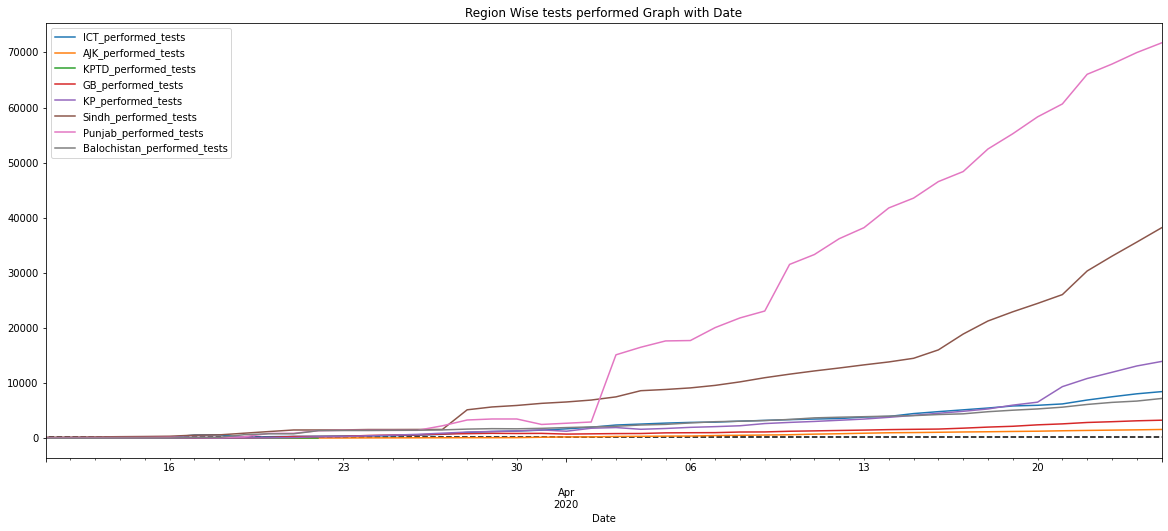

In [0]:
# ploting Number of Tests Performed with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='Cumulative  tests performed', kind='line', figsize=(20,8), title='Region Wise tests performed Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Cumulative  tests performed')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Cumulative  tests performed')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Cumulative  tests performed')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Cumulative  tests performed')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Cumulative  tests performed')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Cumulative  tests performed')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Cumulative  tests performed')
ax.legend(["ICT_performed_tests", "AJK_performed_tests",'KPTD_performed_tests','GB_performed_tests','KP_performed_tests','Sindh_performed_tests','Punjab_performed_tests','Balochistan_performed_tests']);
ax.hlines(xmin=0, xmax=10000000, y =avg_tests_performed, linestyles='dashed', color='black')


***Dotted line in the graph is showing average value.***
***Ranking of regions in the decreasing order of tests performed is:***

        1. Punjab
        2. Sindh
        3. KP
        4. ICT
        5. Balochistan
        6. GB
        7. AJK

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

>***6. VISUALIZE REGION-WISE FOREIGN TRANSMISSION PERCENTAGES WITH DATE-TIME SERIES***

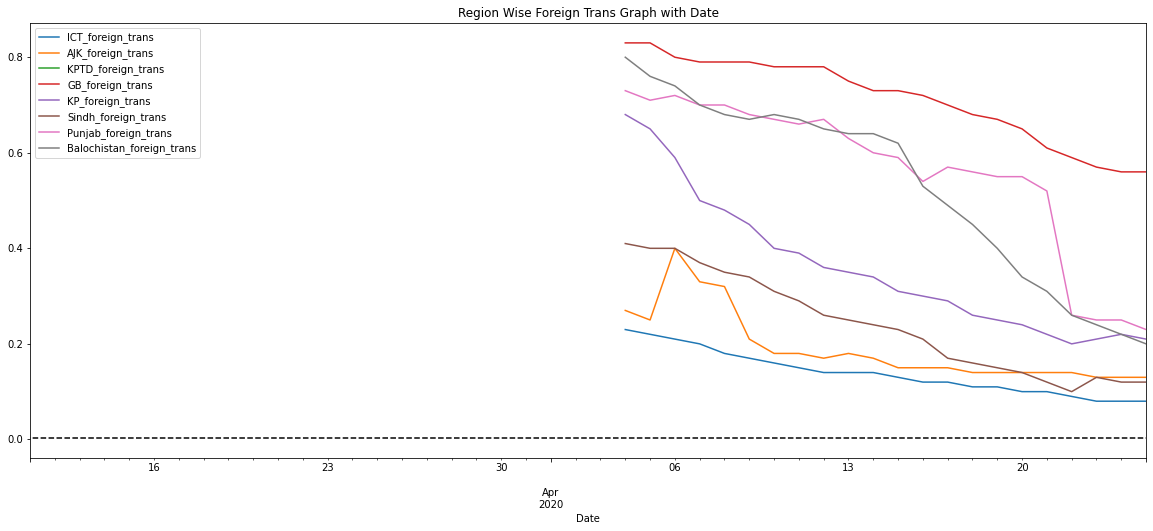

In [0]:
# ploting Foreign Transmission Percentage rates with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='Foreign Transmission Percentage ', kind='line', figsize=(20,8), title='Region Wise Foreign Trans Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Foreign Transmission Percentage ')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Foreign Transmission Percentage ')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Foreign Transmission Percentage ')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Foreign Transmission Percentage ')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Foreign Transmission Percentage ')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Foreign Transmission Percentage ')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Foreign Transmission Percentage ')
ax.legend(["ICT_foreign_trans", "AJK_foreign_trans",'KPTD_foreign_trans','GB_foreign_trans','KP_foreign_trans','Sindh_foreign_trans','Punjab_foreign_trans','Balochistan_foreign_trans']);
ax.hlines(xmin=0, xmax=10000000, y =avg_for_trans, linestyles='dashed', color='black')

***We can see decreasing trend in foriegn transmission of COVID-19 in all the regions.***
***Dotted line in the graph is showing average value.***
***Ranking of regions with better control over foreign transmissions is:***

        1. ICT
        2. Sindh
        3. AJK
        4. KP
        5. Balochistan
        6. Punjab
        7. GB
         

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

>***7. VISUALIZE REGION-WISE LOCAL TRANSMISSION PERCENTAGES WITH DATE-TIME SERIES***

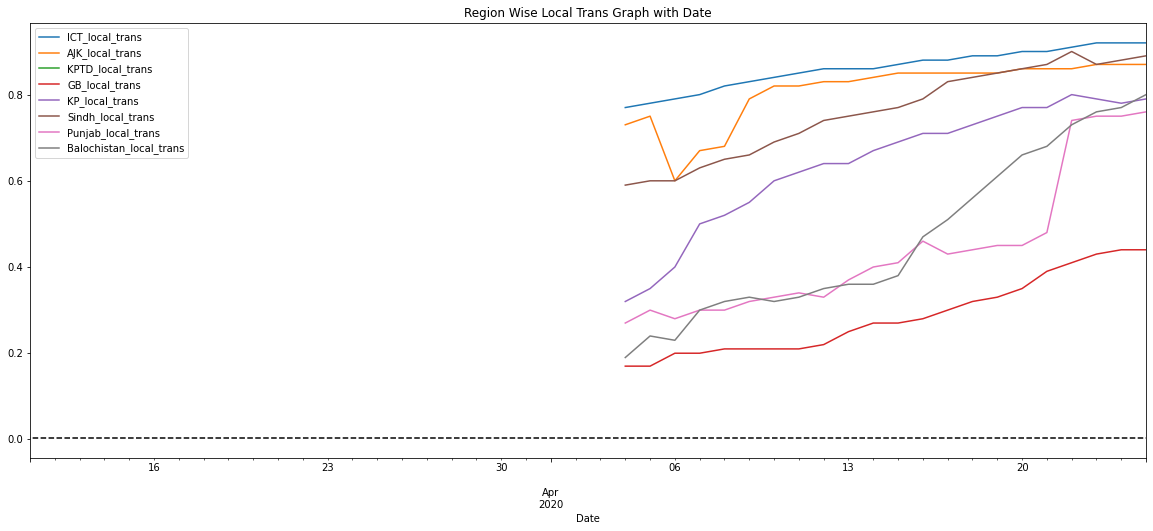

In [0]:
# ploting Local Transmission Percentage's rate with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='Local Transmission Percentage ', kind='line', figsize=(20,8), title='Region Wise Local Trans Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Local Transmission Percentage ')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Local Transmission Percentage ')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Local Transmission Percentage ')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Local Transmission Percentage ')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Local Transmission Percentage ')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Local Transmission Percentage ')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Local Transmission Percentage ')
ax.legend(["ICT_local_trans", "AJK_local_trans",'KPTD_local_trans','GB_local_trans','KP_local_trans','Sindh_local_trans','Punjab_local_trans','Balochistan_local_trans']);
ax.hlines(xmin=0, xmax=10000000, y =avg_loc_trans, linestyles='dashed', color='black')

***We can see an increasing trend in the local transmission of COVID-19 in all the regions.***
***Dotted line in the graph is showing average value.***
***Ranking of regions with better control over local transmissions is:***

        1. ICT
        2. AJK
        3. Sindh
        4. KP
        5. Balochistan
        6. Punjab
        7. GB

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

>***8. VISUALIZE REGION-WISE QUARANTINE FACILITIES RATING WITH DATE-TIME SERIES***

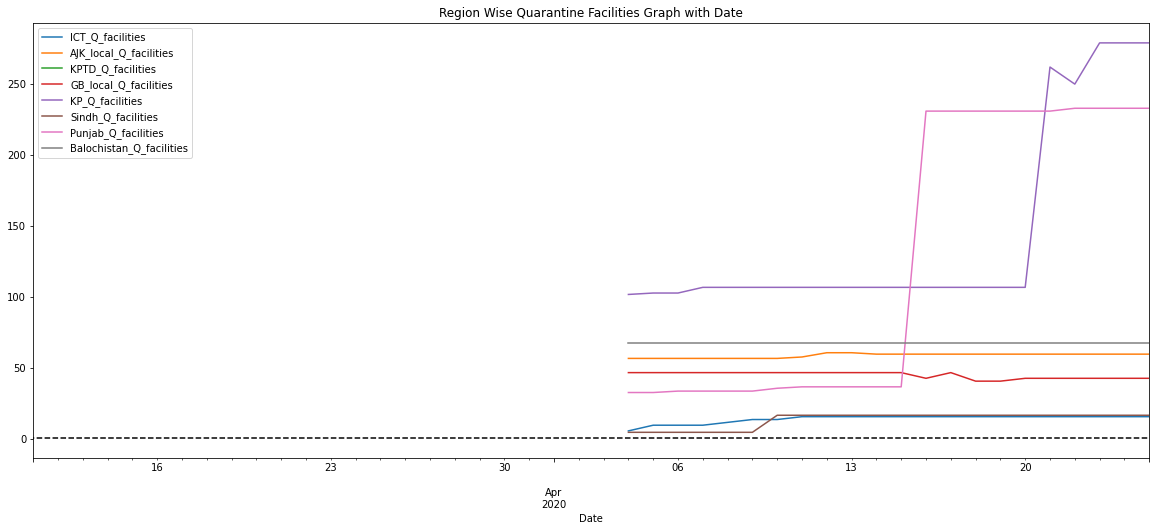

In [0]:
# ploting Quarantine Facilities Rating with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='Quarantine Facilities', kind='line', figsize=(20,8), title='Region Wise Quarantine Facilities Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Quarantine Facilities')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Quarantine Facilities')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Quarantine Facilities')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Quarantine Facilities')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Quarantine Facilities')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Quarantine Facilities')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Quarantine Facilities')
ax.legend(["ICT_Q_facilities", "AJK_local_Q_facilities",'KPTD_Q_facilities','GB_local_Q_facilities','KP_Q_facilities','Sindh_Q_facilities','Punjab_Q_facilities','Balochistan_Q_facilities']);
ax.hlines(xmin=0, xmax=10000000, y =avg_facilities, linestyles='dashed', color='black')

***Dotted line in the graph is showing average value.***
***Ranking of regions with decreasing order of quarantine facilities is:***

        1. KP
        2. Punjab
        3. Balochistan
        4. AJK
        5. GB
        6. Sindh
        7. ICT

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

>***9. VISUALIZE REGION-WISE NUMBER OF HOSPITALS WITH DATE-TIME SERIES***

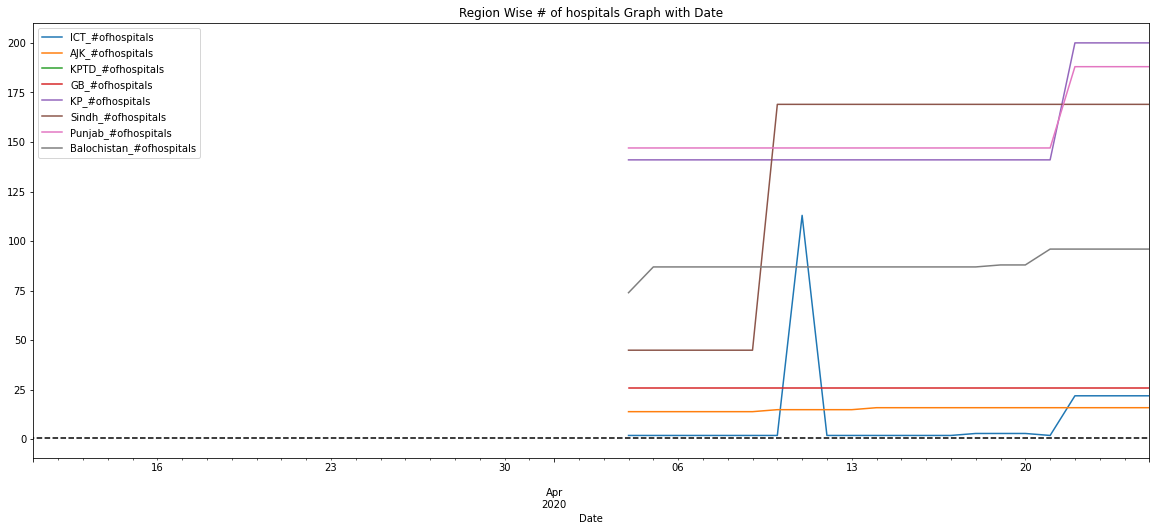

In [0]:
# ploting Number of Hospitals trend with Date for every region on one graph to see the difference

ax = ict.plot(x ='Date', y='No of hospitals ', kind='line', figsize=(20,8), title='Region Wise # of hospitals Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='No of hospitals ')
ax2 = kptd.plot(ax=ax1, x ='Date', y='No of hospitals ')
ax3 = gb.plot(ax=ax2, x ='Date', y='No of hospitals ')
ax4 = kp.plot(ax=ax3, x ='Date', y='No of hospitals ')
ax5 = sindh.plot(ax=ax4, x ='Date', y='No of hospitals ')
ax6 = punjab.plot(ax=ax5, x ='Date', y='No of hospitals ')
ax7 = balochistan.plot(ax=ax6, x ='Date', y='No of hospitals ')
ax.legend(["ICT_#ofhospitals", "AJK_#ofhospitals",'KPTD_#ofhospitals','GB_#ofhospitals','KP_#ofhospitals','Sindh_#ofhospitals','Punjab_#ofhospitals','Balochistan_#ofhospitals']);
ax.hlines(xmin=0, xmax=10000000, y =avg_hospitals, linestyles='dashed', color='black')

> Here the empty region of Graph is showing the unavailability of data in the respective dates 

***Dotted line in the graph is showing average value.***
***Ranking of regions with decreasing order of number of hospitals is:***

        1. KP
        2. Punjab
        3. Sindh
        4. Balochistan
        5. GB
        6. ICT
        7. AJK

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with 5 regions as required.
   ---

In [0]:
# Getting the range of values to use in the analyses further
print('Dataset End Values for every region is printed value-1 : ')
print("ICT: ", len(ict))
print("AJK: ", len(ict)+len(ajk))
print("KPTD: ", len(ict)+len(ajk)+len(kptd))
print("GB: ", len(ict)+len(ajk)+len(kptd)+len(gb))
print("KP: ", len(ict)+len(ajk)+len(kptd)+len(gb)+len(kp))
print("Sindh: ", len(ict)+len(ajk)+len(kptd)+len(gb)+len(kp)+len(sindh))
print("Punjab: ", len(ict)+len(ajk)+len(kptd)+len(gb)+len(kp)+len(sindh)+len(punjab))
print("Balochistan: ", len(ict)+len(ajk)+len(kptd)+len(gb)+len(kp)+len(sindh)+len(punjab)+len(balochistan))

Dataset End Values for every region is printed value-1 : 
ICT:  46
AJK:  92
KPTD:  104
GB:  150
KP:  196
Sindh:  242
Punjab:  288
Balochistan:  334


In [0]:
# region-wise Expired vs Recovered Data 

Regions = ['ICT', 'AJK', 'KPTD', 'GB', 'KP', 'Sindh', 'Punjab', 'Balochistan']

exp = [ict['Cumulative Expired (region/province wise)'][45], ajk['Cumulative Expired (region/province wise)'][91], kptd['Cumulative Expired (region/province wise)'][103], gb['Cumulative Expired (region/province wise)'][149], kp['Cumulative Expired (region/province wise)'][195], sindh['Cumulative Expired (region/province wise)'][241], punjab['Cumulative Expired (region/province wise)'][287], balochistan['Cumulative Expired (region/province wise)'][333]]

rec = [ict['Recovered'][45], ajk['Recovered'][91], kptd['Recovered'][103], gb['Recovered'][149], kp['Recovered'][195], sindh['Recovered'][241], punjab['Recovered'][287], balochistan['Recovered'][333]]


In [0]:
# create DataFrame from above data
exp_rec_df = pd.DataFrame({'expired': exp,
                   'recovered': rec}, index=Regions)

In [0]:
# showing total number of Expired and Recovered patients for every region
exp_rec_df

,expired,recovered
ICT,3,29.0
AJK,0,32.0
KPTD,0,NaN
GB,3,216.0
KP,93,485.0
Sindh,78,802.0
Punjab,81,1126.0
Balochistan,11,176.0


>***10. VISUALIZE REGION-WISE TOTAL EXPIRED AND RECOVRED PATIENTS***

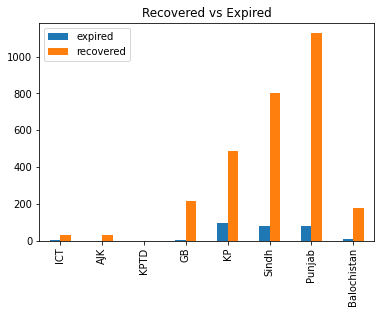

In [0]:
# plotting total number of Expired vs Recovered patients for every region

exp_rec_df.plot(kind='bar', title='Recovered vs Expired')

In [0]:
# region-wise Expired vs total Number of Positive Tested Patients Data 

Regions = ['ICT', 'AJK', 'KPTD', 'GB', 'KP', 'Sindh', 'Punjab', 'Balochistan']

exp = [ict['Cumulative Expired (region/province wise)'][45], ajk['Cumulative Expired (region/province wise)'][91], kptd['Cumulative Expired (region/province wise)'][103], gb['Cumulative Expired (region/province wise)'][149], kp['Cumulative Expired (region/province wise)'][195], sindh['Cumulative Expired (region/province wise)'][241], punjab['Cumulative Expired (region/province wise)'][287], balochistan['Cumulative Expired (region/province wise)'][333]]

pos = [ict['Cumulative  Test positive'][45],ajk['Cumulative  Test positive'][91], kptd['Cumulative  Test positive'][103], gb['Cumulative  Test positive'][149] , kp['Cumulative  Test positive'][195], sindh['Cumulative  Test positive'][241], punjab['Cumulative  Test positive'][287], balochistan['Cumulative  Test positive'][333]]


In [0]:
# create DataFrame from above data
exp_pos_df = pd.DataFrame({'expired': exp,
                   'positive': pos}, index=Regions)

In [0]:
# showing total number of Expired and Positive Tested Patients for every region
exp_pos_df

,expired,positive
ICT,3,235
AJK,0,55
KPTD,0,0
GB,3,308
KP,93,1793
Sindh,78,4232
Punjab,81,5378
Balochistan,11,722


>***11. VISUALIZE REGION-WISE TOTAL POSITVE TESTED PATIENTS WHO ARE EXPIRED***

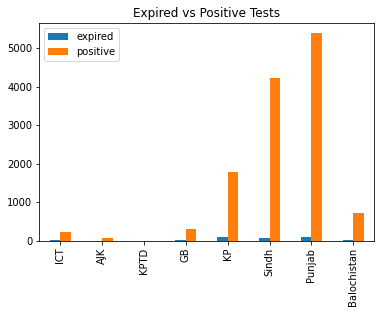

In [0]:
# plotting total number of Expired vs Postive Tested patients for every region
exp_pos_df.plot(kind='bar', title='Expired vs Positive Tests')

In [0]:
# region-wise Total Recovered vs total Number of Postive Tested Patients Data 

Regions = ['ICT', 'AJK', 'KPTD', 'GB', 'KP', 'Sindh', 'Punjab', 'Balochistan']

rec = [ict['Recovered'][45], ajk['Recovered'][91], kptd['Recovered'][103], gb['Recovered'][149], kp['Recovered'][195], sindh['Recovered'][241], punjab['Recovered'][287], balochistan['Recovered'][333]]

pos = [ict['Cumulative  Test positive'][45],ajk['Cumulative  Test positive'][91], kptd['Cumulative  Test positive'][103], gb['Cumulative  Test positive'][149] , kp['Cumulative  Test positive'][195], sindh['Cumulative  Test positive'][241], punjab['Cumulative  Test positive'][287], balochistan['Cumulative  Test positive'][333]]

In [0]:
# creat DataFrame from above data
rec_pos_df = pd.DataFrame({'recovered': rec,
                   'positive': pos}, index=Regions)

In [0]:
# show total number of recovered and positive tested patients for every region
rec_pos_df

,recovered,positive
ICT,29.0,235
AJK,32.0,55
KPTD,NaN,0
GB,216.0,308
KP,485.0,1793
Sindh,802.0,4232
Punjab,1126.0,5378
Balochistan,176.0,722


>***12. VISUALIZE REGION-WISE POSITVE TESTED PATIENTS WHO ARE RECOVERED***

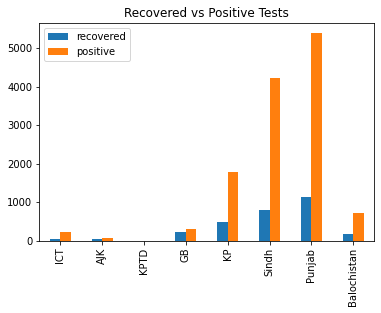

In [0]:
# plotting total number of recovered and positive tested patients for every region
rec_pos_df.plot(kind='bar', title='Recovered vs Positive Tests')

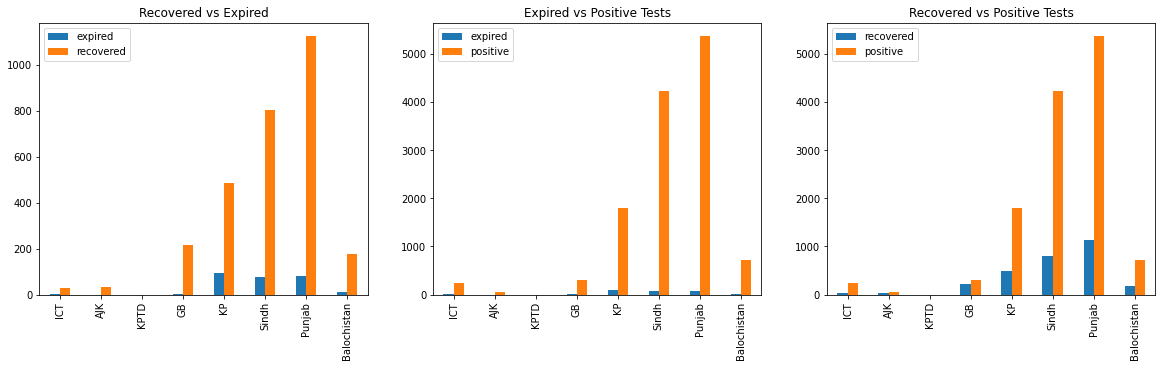

In [0]:
# comparing all the three above graphs 

fig, axes = plt.subplots(nrows=1, ncols=3)

exp_rec_df.plot(kind='bar', title='Recovered vs Expired', figsize=(20,5), ax=axes[0])
exp_pos_df.plot(kind='bar', title='Expired vs Positive Tests', figsize=(20,5),ax=axes[1])
rec_pos_df.plot(kind='bar', title='Recovered vs Positive Tests',figsize=(20,5), ax=axes[2])

***We can see that KPTD data is almost near to none, so we are not considering KPTD In our analyses for now.***

***1. EXPIRED VS RECOVERED***

***Ranking in the decreasing order of recovered/expired ratio is:***

        1. Punjab
        2. Sindh
        3. KP
        4. GB
        5. AJK
        6. Balochistan
        7. ICT
      
***2. EXPIRED VS POSITIVE***

***Ranking in the increasing order of expired/positive ratio is:***

        1. GB
        2. ICT
        3. Punjab
        4. Balochistan
        5. AJK
        6. Sindh
        7. KP
        
***3. RECOVERED VS POSITIVE***

***Ranking in the decreasing order of recovered/positive ratio is:***

        1. GB
        2. AJK
        3. KP
        4. Balochistan
        5. Punjab
        6. Sindh
        7. ICT

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with top 5 regions as required.
   ---

>***13. VISUALIZE REGION-WISE POSITVE TESTED PATIENTS OUT OF TOTAL TESTS PERFORMED WITH DATE-TIME SERIES***

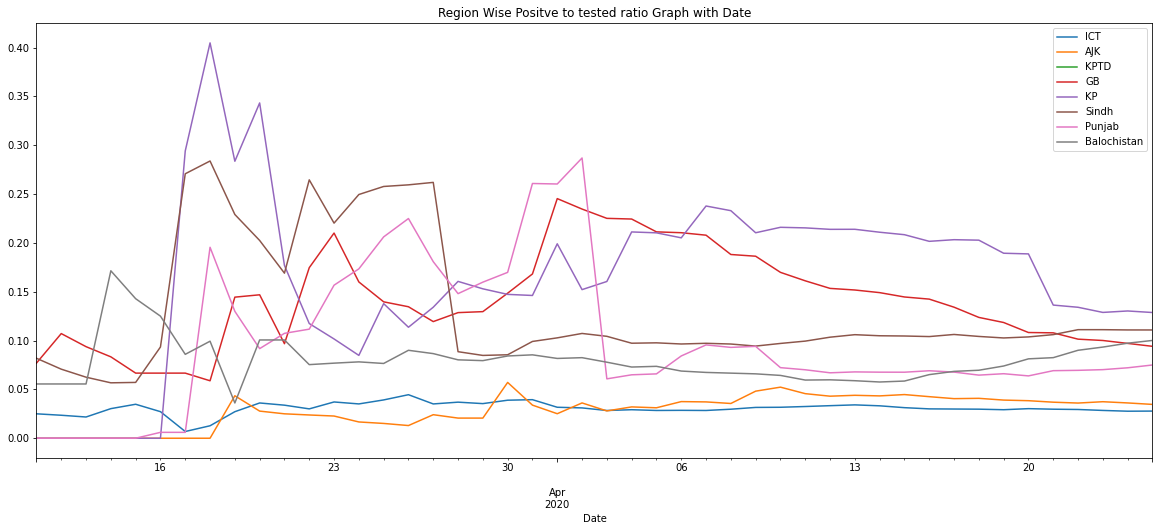

In [0]:
# creating positive tested vs tests performed ratios for every region to get insights about the negative tested patients

ict['Positive Ratio']=ict['Cumulative  Test positive'].div(ict['Cumulative  tests performed'])
ajk['Positive Ratio']=ajk['Cumulative  Test positive'].div(ajk['Cumulative  tests performed'])
kptd['Positive Ratio']=kptd['Cumulative  Test positive'].div(kptd['Cumulative  tests performed'])
gb['Positive Ratio']=gb['Cumulative  Test positive'].div(gb['Cumulative  tests performed'])
kp['Positive Ratio']=kp['Cumulative  Test positive'].div(kp['Cumulative  tests performed'])
sindh['Positive Ratio']=sindh['Cumulative  Test positive'].div(sindh['Cumulative  tests performed'])
punjab['Positive Ratio']=punjab['Cumulative  Test positive'].div(punjab['Cumulative  tests performed'])
balochistan['Positive Ratio']=balochistan['Cumulative  Test positive'].div(balochistan['Cumulative  tests performed'])

# plotting Positive vs Tests Performed Ratio for every region with data
# the greater the ratio more will be the postive cases
ax = ict.plot(x ='Date', y='Positive Ratio', kind='line', figsize=(20,8), title='Region Wise Positve to tested ratio Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Positive Ratio')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Positive Ratio')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Positive Ratio')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Positive Ratio')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Positive Ratio')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Positive Ratio')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Positive Ratio')
ax.legend(["ICT", "AJK",'KPTD','GB','KP','Sindh','Punjab','Balochistan']);

***The ranking of all the regions in the decreasing order of positive cases with time is:***

        1. ICT
        2. AJK
        3. Punjab
        4. GB
        5. Balochistan
        6. Sindh
        7. KP

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking as required.
   ---

>***14. VISUALIZE REGION-WISE CRITICAL PATIENTS WITH DATE-TIME SERIES***

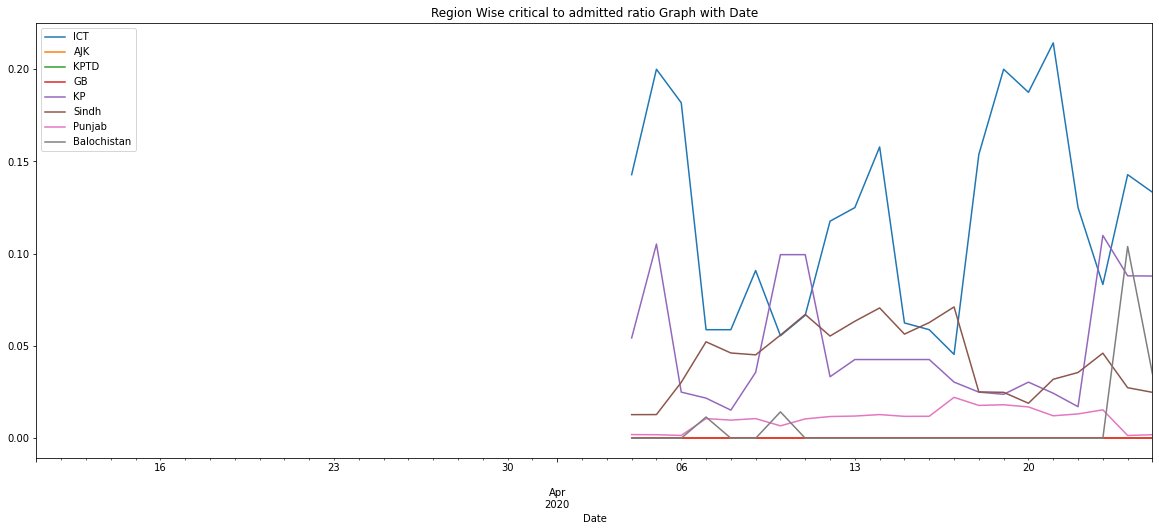

In [0]:
# creating critical patients vs total patients ratio to get the idea of critical condition trends of patients

ict['Critical Ratio']=ict['Admitted Critical'].div(ict['Total Admitted'])
ajk['Critical Ratio']=ajk['Admitted Critical'].div(ajk['Total Admitted'])
kptd['Critical Ratio']=kptd['Admitted Critical'].div(kptd['Total Admitted'])
gb['Critical Ratio']=gb['Admitted Critical'].div(gb['Total Admitted'])
kp['Critical Ratio']=kp['Admitted Critical'].div(kp['Total Admitted'])
sindh['Critical Ratio']=sindh['Admitted Critical'].div(sindh['Total Admitted'])
punjab['Critical Ratio']=punjab['Admitted Critical'].div(punjab['Total Admitted'])
balochistan['Critical Ratio']=balochistan['Admitted Critical'].div(balochistan['Total Admitted'])


# plotting critical ratios for every region with date
# the greater ratio shows more critical situation

ax = ict.plot(x ='Date', y='Critical Ratio', kind='line', figsize=(20,8), title='Region Wise critical to admitted ratio Graph with Date')
ax1 = ajk.plot(ax=ax, x ='Date', y='Critical Ratio')
ax2 = kptd.plot(ax=ax1, x ='Date',  y='Critical Ratio')
ax3 = gb.plot(ax=ax2, x ='Date',  y='Critical Ratio')
ax4 = kp.plot(ax=ax3, x ='Date',  y='Critical Ratio')
ax5 = sindh.plot(ax=ax4, x ='Date',  y='Critical Ratio')
ax6 = punjab.plot(ax=ax5, x ='Date',  y='Critical Ratio')
ax7 = balochistan.plot(ax=ax6, x ='Date',  y='Critical Ratio')
ax.legend(["ICT", "AJK",'KPTD','GB','KP','Sindh','Punjab','Balochistan']);


***The ranking of all the regions in the decreasing order of critical cases with time is:***

        1. GB
        2. AJK
        3. Punjab
        4. Sindh
        5. Balochistan
        6. KP
        7. ICT

   >> NOTE: We have ranked from best-case to worst-case as shown above. This is the current ranking, in the end we will use this in order to form a final ranking with top 5 regions as required.
   ---

# INSIGHTS FROM THE ABOVE DATA ANALYSES

>> We analysed the given data and we have ranked the regions with respect to their success towards COVID-19. 
>> Here are the results from the above analyses,
>> We will consider all the analyses we did above and will rank the regions:

<img src="images/frequency.PNG" />


# FINAL OUTPUT

<img src="images/output.PNG" />